In [1]:
%matplotlib inline
# For basic math operations
import numpy as np

# For plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# For astronomy stuff
import astropy.io.fits as pyfits
from astropy.table import Table

In [11]:
filename = "./HST/hlsp_frontier_hst_acs-60mas-selfcal_abell2744_f814w_v1.0-epoch2_drz.fits"
hdu = pyfits.open(filename)
print(hdu.info())
print(hdu[1].header)

Filename: ./HST/hlsp_frontier_hst_acs-60mas-selfcal_abell2744_f814w_v1.0-epoch2_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    3596   (5350, 6150)   float32   
  1  HDRTAB        1 BinTableHDU    631   166R x 311C   [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, D, J, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, J, 8A, 23A, D, D, D, D, J, J, J, 8A, J, 23A, 9A, 19A, J, 4A, J, D, J, J, J, J, 23A, D, D, D, D, J, J, 3A, 23A, 4A, 4A, J, D, D, D, 3A, 1A, J, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, J, D, 6A, 9A, 8A, D, D, J, 4A, 18A, 3A, J, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, J, J, J, J, J, J, J, D, D, D, D, D, D, 23A, 1A, D, 23A, D, D, D, 3A, 23A, J, 1A, 3A, 6A, D, 3A, 6A, J, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, D, D, D, D, 1A, J, J, J, J, J, J, 23A, J, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 11A, D, 24A, 23A, D, 1A, 1A, D,

In [13]:
filename = "./UNCOVER_DR1_LW_D070_catalog.fits"
hdu = pyfits.open(filename)
print(hdu.info())
print(hdu.header)

data = Table.read(filename, hdu=1)
print(data.colnames)

Filename: ./UNCOVER_DR1_LW_D070_catalog.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    281   50365R x 96C   [K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, K, K, K, K, D, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, D, D, D]   
None


AttributeError: 'HDUList' object has no attribute 'header'

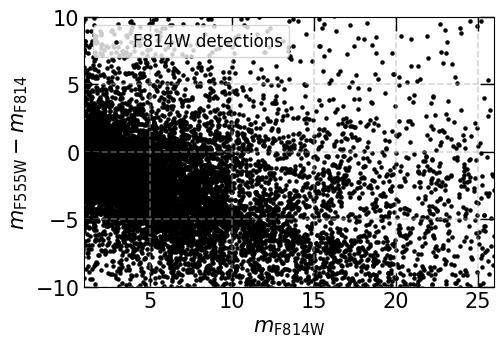

In [14]:
# Initialize the figure
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
fig.subplots_adjust(left=.15, bottom=.20, right=.97, top=.97, wspace=0.25, hspace=0.0)

ax.scatter(data["f_f814w"], data["f_f606w"] - data["f_f814w"], s=5, c="k", label="F814W detections")

# Set range of the plot
ax.set_xlim(1, 26)
ax.set_ylim(-10, 10)

# Set axis labels
ax.set_xlabel(r"$m_{\rm F814W}$", fontsize=15)
ax.set_ylabel(r"$m_{\rm F555W} - m_{\rm F814}$", fontsize=15)

# Set axis ticks
ax.tick_params(axis='both',length=10,width=1,which='major',direction="in", right=True,top=True,labelsize=15)
ax.tick_params(axis='both',length=6, width=1,which='minor',direction="in", right=True,top=True,labelsize=15)

# Set grid and legend
ax.grid(ls="--", lw=1.2, alpha=0.5)
ax.legend(fontsize=12, handletextpad=0, loc="upper left")

plt.show()